# Packages

In [23]:
pip install  import_ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install ndlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Read Data

In [18]:
Graph = nx.read_edgelist('Data/comm2.txt',create_using=nx.Graph(),nodetype=int)

# Read Decision Matrix

In [19]:
#Read our decision Matrix
res = pd.read_csv("Data/resComm2.csv")
res.head(10)

,Node,DC,CC,BC,EC,S+,S-,C
0,686,0.216561,0.218421,0.048057,2.701246e-07,0.038454,0.142088,0.787010
1,687,0.001274,0.115666,0.000000,1.216925e-08,0.047809,0.128745,0.729210
2,688,0.001274,0.115666,0.000000,1.216925e-08,0.056551,0.118178,0.676352
3,689,0.001274,0.115666,0.000000,1.216925e-08,0.079416,0.084373,0.515132
4,690,0.001274,0.115666,0.000000,1.216925e-08,0.091859,0.073181,0.443414
5,691,0.001274,0.115666,0.000000,1.216925e-08,0.095394,0.071124,0.427126
6,692,0.001274,0.115666,0.000000,1.216925e-08,0.101845,0.062259,0.379388
7,693,0.001274,0.115666,0.000000,1.216925e-08,0.106434,0.063799,0.374776
8,694,0.001274,0.115666,0.000000,1.216925e-08,0.103636,0.058976,0.362678
9,695,0.001274,0.115666,0.000000,1.216925e-08,0.112790,0.047034,0.294284


# The top-10 ranked nodes by Topsis and Centrality measures

In [20]:
#The top-10 ranked nodes by degree centrality (DC)
DCR = res[["Node", "DC"]]
DCR = DCR.sort_values(by='DC', ascending=False)
DCR.rename(columns = {'Node':'DCN'}, inplace=True)

DCR["DCN"].to_csv("Data/DCRComm2.csv",index=False)

In [21]:
#The top-10 ranked nodes by betweenness centrality (BC)
BCR = res[["Node", "BC"]]
BCR = BCR.sort_values(by='BC', ascending=False)
BCR.rename(columns = {'Node':'BCN'}, inplace=True)

BCR["BCN"].to_csv("Data/BCRComm2.csv",index=False)

In [22]:
#The top-10 ranked nodes by closeness centrality (CC)
CCR = res[["Node", "CC"]]
CCR = CCR.sort_values(by='CC', ascending=False)
CCR.rename(columns = {'Node':'CCN'}, inplace=True)

CCR["CCN"].to_csv("Data/CCRComm2.csv",index=False)

In [23]:
#The top-10 ranked nodes by eigenvector centrality (EC)
ECR = res[["Node", "EC"]]
ECR = ECR.sort_values(by='EC', ascending=False)
ECR.rename(columns = {'Node':'ECN'}, inplace=True)

ECR["ECN"].to_csv("Data/ECRComm2.csv",index=False)

In [24]:
fac = pd.concat([pd.read_csv("Data/DCRComm2.csv"),pd.read_csv("Data/BCRComm2.csv"), pd.read_csv("Data/CCRComm2.csv"), pd.read_csv("Data/ECRComm2.csv")],axis=1)

In [25]:
#Concate the results
comm2 = pd.concat([fac,pd.read_csv("Data/TopsisComm2.csv")],axis=1)

comm2 = comm2.head(10)
comm2

,DCN,BCN,CCN,ECN,Node
0,686,3604,3604,3545,3604
1,3545,3830,3545,3596,3830
2,3596,686,3830,3838,686
3,3604,3521,3521,3938,3521
4,3938,3705,3596,3604,3705
5,3830,3628,3869,3611,3545
6,713,3918,3617,3488,3628
7,3838,3545,3722,3804,3596
8,3980,3722,3672,3790,3918
9,3521,3566,3705,3824,3722


# Application SI Model

In [26]:
def SI(nodes):
    n = 786  
    Lst = []
    model = ep.SIModel(Graph)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.3)
    cfg.add_model_initial_configuration('Infected', nodes)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'Nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break
    
    Lst.append(res['iteration'].tolist())
    Lst.append(res['Nb_Susceptible'].tolist())
    Lst.append(res['Nb_infected'].tolist())
                     
    return Lst

In [27]:
Rank_DC = set(comm2['DCN'])
Rank_BC = set(comm2['BCN'])
Rank_CC = set(comm2['CCN'])
Rank_EC = set(comm2['ECN'])
Rank_Topsis = set(comm2['Node'])


In [28]:
DClst = []
BClst = []
CClst = []
EClst = []
TOPSISlst = []
for i in range(10):
    DClst.append(SI(Rank_DC))
    BClst.append(SI(Rank_BC))
    CClst.append(SI(Rank_CC))
    EClst.append(SI(Rank_EC))
    TOPSISlst.append(SI(Rank_Topsis))

In [29]:
def Std_mean(lis):
    dc = {}
    sd = []
    mean = []
    for i in range(10):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]
    for i in range(10):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][2][j])
    for i in dc:
        sd.append(np.std(dc[i]))
        mean.append(np.mean(dc[i]))
    return mean, sd

In [30]:
DCmean, DCsd = Std_mean(DClst)
BCmean, BCsd = Std_mean(BClst)
CCmean, CCsd = Std_mean(CClst)
ECmean, ECsd = Std_mean(EClst)
TOPSISmean, TOPSISsd = Std_mean(TOPSISlst)

# Plot the results

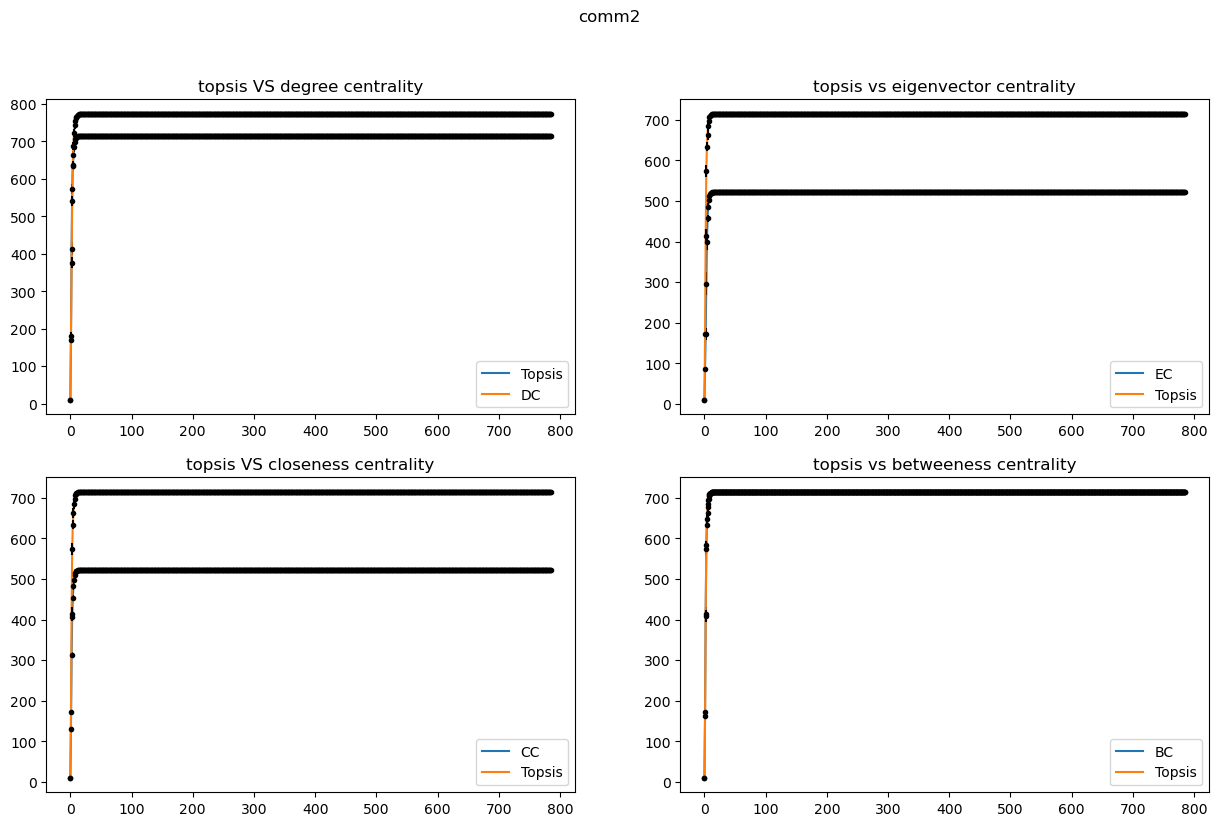

In [31]:

fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS degree centrality')
ax[0, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[0, 0].plot(list(range(len(DCmean))) , DCmean, label='DC')
ax[0, 0].errorbar(list(range(len(DCmean))), DCmean, yerr=DCsd, fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('topsis VS closeness centrality')
ax[1, 0].plot(list(range(len(CCmean))) , CCmean, label='CC')
ax[1, 0].errorbar(list(range(len(CCmean))) , CCmean, yerr=CCsd, fmt ='.k')
ax[1, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[1, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(list(range(len(ECmean))) , ECmean, label='EC')
ax[0, 1].errorbar(list(range(len(ECmean))) , ECmean, yerr=ECsd, fmt ='.k')
ax[0, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[0, 1].legend()

ax[1, 1].set_title('topsis vs betweeness centrality')
ax[1, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='BC')
ax[1, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 1].plot(list(range(len(BCmean))) , BCmean, label='Topsis')
ax[1, 1].errorbar(list(range(len(BCmean))) , BCmean, yerr=BCsd, fmt ='.k')
ax[1, 1].legend()


fig.suptitle('comm2')
plt.show()